In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
import warnings
warnings.filterwarnings("ignore")

In [43]:
df=pd.read_csv(r"D:\iris\data\Iris.csv")
print("Describing the data: ",df.describe())
print("Info of the df:",df.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidt

In [44]:
print("10 first samples of the dataset:",df.head(10))
print("10 last samples of the dataset:",df.tail(10))

10 first samples of the dataset:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
10 last samples of the dataset:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141          

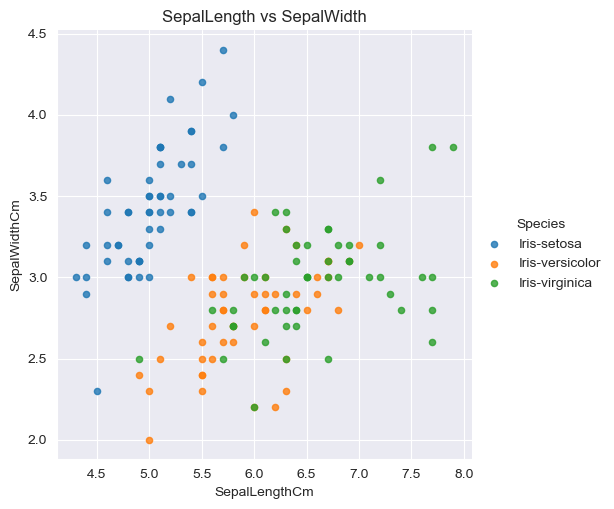

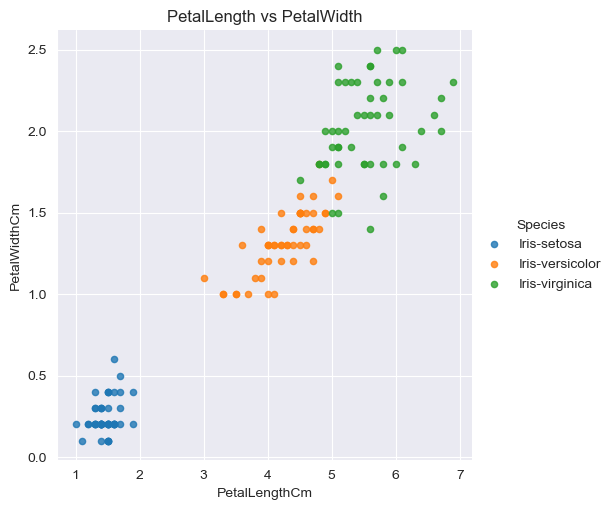

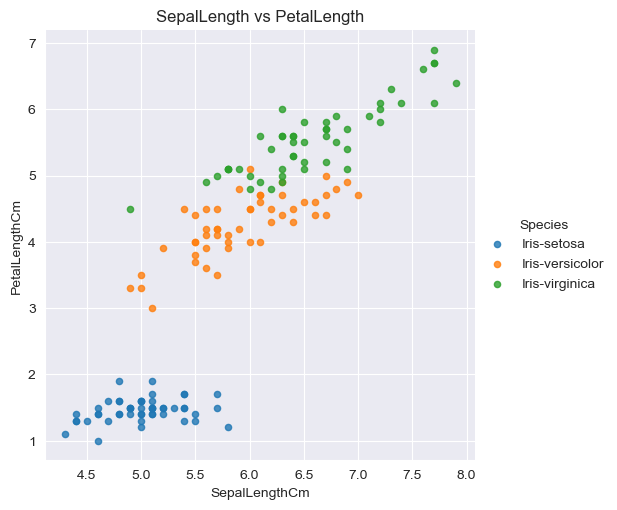

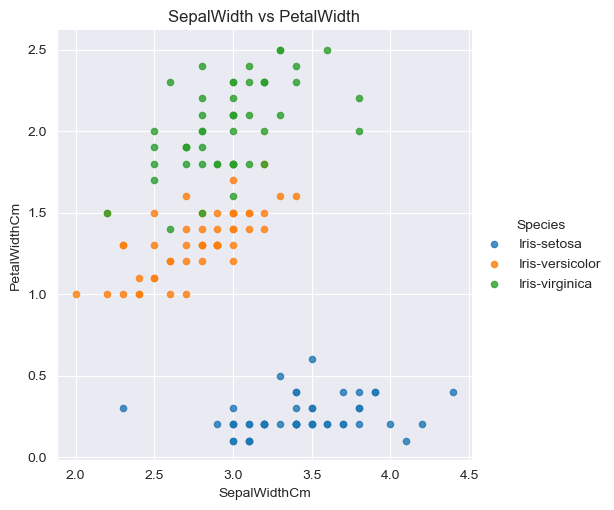

In [45]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 20})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 20})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 20})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 20})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [46]:
df.loc[df["Species"]=="Iris-setosa","Species"]=0
df.loc[df["Species"]=="Iris-versicolor","Species"]=1
df.loc[df["Species"]=="Iris-virginica","Species"]=2
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [47]:
df=df.iloc[np.random.permutation(len(df))]
print(df.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
134  135            6.1           2.6            5.6           1.4       2
89    90            5.5           2.5            4.0           1.3       1
139  140            6.9           3.1            5.4           2.1       2
34    35            4.9           3.1            1.5           0.1       0
79    80            5.7           2.6            3.5           1.0       1


In [48]:
X=df.iloc[:,1:5].values
y=df.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[6.1 2.6 5.6 1.4]
 [5.5 2.5 4.  1.3]
 [6.9 3.1 5.4 2.1]]
Examples of y
 [2 1 2]


In [49]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.08439845 0.06882619 0.11018585 0.08052096]
 [0.07609697 0.06617903 0.07870418 0.07476947]
 [0.0954671  0.082062   0.10625064 0.12078145]]


In [50]:
total_length=len(df)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [51]:
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [52]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              5000      
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 dense_14 (Dense)            (None, 300)               150300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=10,verbose=1)

Epoch 1/10
12/12 [==============================] - 1s 28ms/step - loss: 1.0581 - accuracy: 0.4333 - val_loss: 0.9907 - val_accuracy: 0.7000
Epoch 2/10
12/12 [==============================] - 0s 8ms/step - loss: 0.8515 - accuracy: 0.6583 - val_loss: 0.6491 - val_accuracy: 0.7667
Epoch 3/10
12/12 [==============================] - 0s 8ms/step - loss: 0.5293 - accuracy: 0.7750 - val_loss: 0.3642 - val_accuracy: 0.8667
Epoch 4/10
12/12 [==============================] - 0s 9ms/step - loss: 0.3739 - accuracy: 0.8667 - val_loss: 0.2053 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 0s 9ms/step - loss: 0.2447 - accuracy: 0.9333 - val_loss: 0.2437 - val_accuracy: 0.8667
Epoch 6/10
12/12 [==============================] - 0s 8ms/step - loss: 0.2218 - accuracy: 0.9083 - val_loss: 0.1458 - val_accuracy: 0.9000
Epoch 7/10
12/12 [==============================] - 0s 9ms/step - loss: 0.1591 - accuracy: 0.9250 - val_loss: 0.0944 - val_accuracy: 1.0000
Epoch 8/10
12/12 [=

In [55]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100
print("Accuracy of the dfset",accuracy )

1/1 [==============================] - 0s 89ms/step
Accuracy of the dfset 100.0


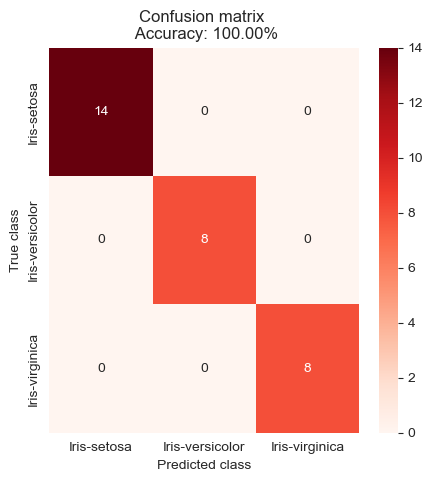

In [56]:
#confusion matrix using seaborn
LABELS = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = confusion_matrix(y_label, predict_label)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Reds");
plt.title("Confusion matrix \n Accuracy: {:.2f}%".format(accuracy))
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()